In [ ]:
#rohith yadav vorsa ID: rvorsa

In [ ]:
#part a

C:\Users\91636\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


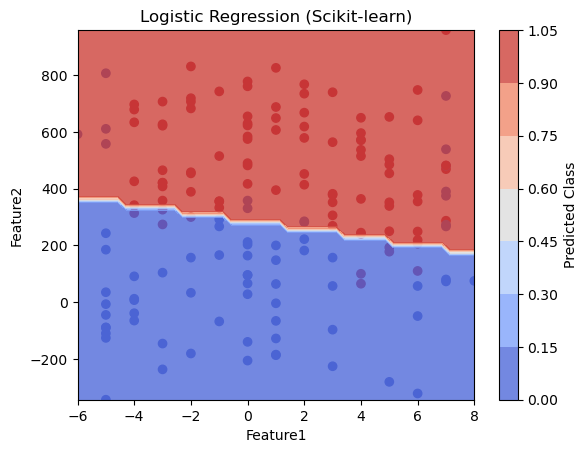

Test Accuracy: 0.9


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# data
column_names = ['Feature1', 'Feature2', 'Label']
data = pd.read_csv('data.csv', names=column_names)

# divide the data into X and Y
X_train_rm = data[['Feature1', 'Feature2']]
y_train_rm = data['Label']

# dividing the dataset to training and testing subsets
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train_rm, y_train_rm, test_size=0.2, random_state=42)

# Using Scikit-Learn, building the logistic regression model
rm = LogisticRegression()
rm.fit(X_train_split, y_train_split)

# drawing decision boundry and data points
plt.scatter(X_train_split['Feature1'], X_train_split['Feature2'], c=y_train_split, cmap='coolwarm')  # Change colormap here
min_feat1, max_feat1 = X_train_split['Feature1'].min(), X_train_split['Feature1'].max()
min_feat2, max_feat2 = X_train_split['Feature2'].min(), X_train_split['Feature2'].max()
xx1, xx2 = np.meshgrid(np.linspace(min_feat1, max_feat1), np.linspace(min_feat2, max_feat2))
pred = rm.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
plt.contourf(xx1, xx2, pred, cmap='coolwarm', alpha=0.8)  # Change colormap here
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Logistic Regression (Scikit-learn)')
plt.colorbar(label='Predicted Class')
plt.show()

# Analyzing the model using the test data.
accuracy_split = accuracy_score(y_test_split, rm.predict(X_test_split))
print("Test Accuracy:", accuracy_split)


In [ ]:
# part b

C:\Users\91636\AppData\Local\Temp\ipykernel_23908\4261635575.py:8: RuntimeWarning: divide by zero encountered in log
  J = lambda X, y, θ: np.mean(-y * np.log(σ(X @ θ)) - (1 - y) * np.log(1 - σ(X @ θ)))
C:\Users\91636\AppData\Local\Temp\ipykernel_23908\4261635575.py:8: RuntimeWarning: invalid value encountered in multiply
  J = lambda X, y, θ: np.mean(-y * np.log(σ(X @ θ)) - (1 - y) * np.log(1 - σ(X @ θ)))
C:\Users\91636\AppData\Local\Temp\ipykernel_23908\4261635575.py:5: RuntimeWarning: overflow encountered in exp
  σ = lambda z: 1 / (1 + np.exp(-z))


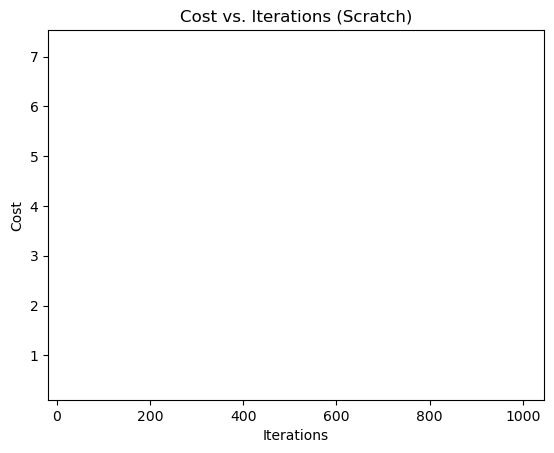

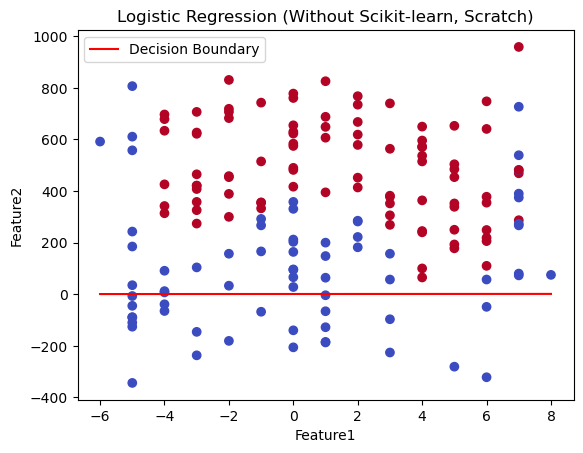

Test Accuracy (Scratch): 0.725


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# function names shortened
σ = lambda z: 1 / (1 + np.exp(-z))

# Defining the cost function
J = lambda X, y, θ: np.mean(-y * np.log(σ(X @ θ)) - (1 - y) * np.log(1 - σ(X @ θ)))

# Gradient function
grad_J = lambda X, y, θ: X.T @ (σ(X @ θ) - y) / len(y)

# Gradient descent function
def grad_desc(X, y, θ, α, iters):
    costs = []
    for i in range(iters):
        θ -= α * grad_J(X, y, θ)
        costs.append(J(X, y, θ))
    return θ, costs

# Data
X_train_values = X_train_split[['Feature1', 'Feature2']].values
y_train_values = y_train_split.values.reshape(-1, 1)
X_test_values = X_test_split[['Feature1', 'Feature2']].values
y_test_values = y_test_split.values.reshape(-1, 1)

# Include an intercept term in the training set.
X_train_intercept = np.c_[np.ones((X_train_values.shape[0], 1)), X_train_values]

# Initializing the parameters
θ = np.zeros((X_train_intercept.shape[1], 1))

# Hyperparameters
α, iters = 0.01, 1000

# Developing a model for logistic regression.
θ_final, costs = grad_desc(X_train_intercept, y_train_values, θ, α, iters)

# Ploting the cost in relation to the number of iterations.
plt.plot(range(1, iters + 1), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations (Scratch)')
plt.show()

# Ploting data points and decision boundary
plt.scatter(X_train_values[:, 0], X_train_values[:, 1], c=y_train_values.flatten(), cmap='coolwarm')
x_vals = [np.min(X_train_values[:, 0]), np.max(X_train_values[:, 0])]
y_vals = -(θ_final[0] + θ_final[1] * x_vals) / θ_final[2]
plt.plot(x_vals, y_vals, label='Decision Boundary')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Logistic Regression (Without Scikit-learn, Scratch)')
plt.legend()
plt.show()

# Including an intercept term in the test results.
X_test_intercept = np.c_[np.ones((X_test_values.shape[0], 1)), X_test_values]

# Making predictions and assessing the model using test data.
h_test = σ(X_test_intercept @ θ_final)
y_pred = (h_test >= 0.5).astype(int)
accuracy = np.mean(y_pred == y_test_values)
print("Test Accuracy (Scratch):", accuracy)


In [ ]:
# part c

C:\Users\91636\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


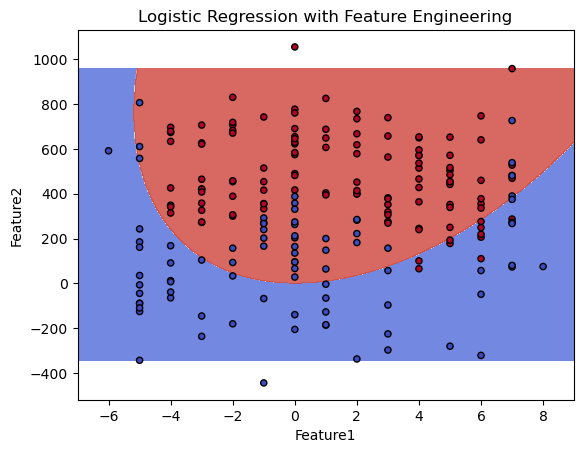

Testing Accuracy: 0.75


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Loading the dataset
column_names = ['Feature1', 'Feature2', 'Label']
dataset = pd.read_csv('data.csv', names=column_names)

# Splitting features and target variable
input_features = dataset[['Feature1', 'Feature2']]
target_variable = dataset['Label']

# Include polynomial features in feature engineering
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(input_features)

# dividin the data to training and testing sets
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_poly, target_variable, test_size=0.2, random_state=42)

# Developing a model for logistic regression.
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_split, y_train_split)

# Defining the plotting variables.
min_feat1, max_feat1 = X_train_split[:, 1].min(), X_train_split[:, 1].max()
min_feat2, max_feat2 = X_train_split[:, 2].min(), X_train_split[:, 2].max()

# range for plotting
x1_min, x1_max = min_feat1 - 1, max_feat1 + 1
x2_min, x2_max = min_feat2 - 1, max_feat2 + 1

# To plot, create a meshgrid.
h = .02
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

# Make predictions on the meshgrid points using the logistic regression model.
meshgrid_results = log_reg_model.predict(poly_features.transform(np.c_[xx1.ravel(), xx2.ravel()]))

# Resize the output so it matches to the meshgrid's dimensions.
meshgrid_results = meshgrid_results.reshape(xx1.shape)

# Plotting decision boundary and data points
plt.contourf(xx1, xx2, meshgrid_results, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(input_features.iloc[:, 0], input_features.iloc[:, 1], c=target_variable, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

# Changing the title and labels.
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Logistic Regression with Feature Engineering')

plt.show()

# Analyze the model using test data.
y_pred_test = log_reg_model.predict(X_test_split)
accuracy_test = accuracy_score(y_test_split, y_pred_test)
print("Testing Accuracy:", accuracy_test)


In [ ]:
#part d

Iteration 0, Training Loss: 0.6931471805599454, Validation Loss: 0.6917927056376092
Validation loss increased. Stopping training.


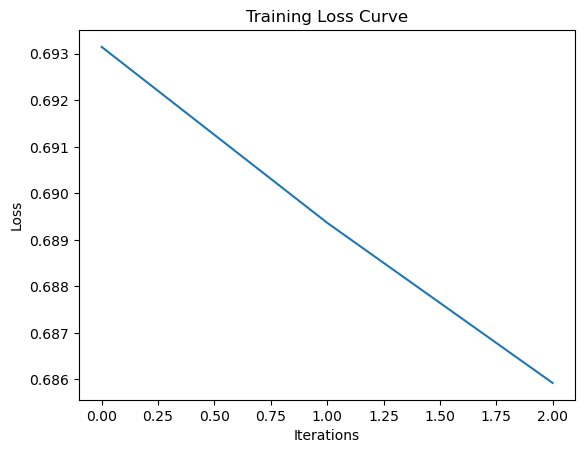

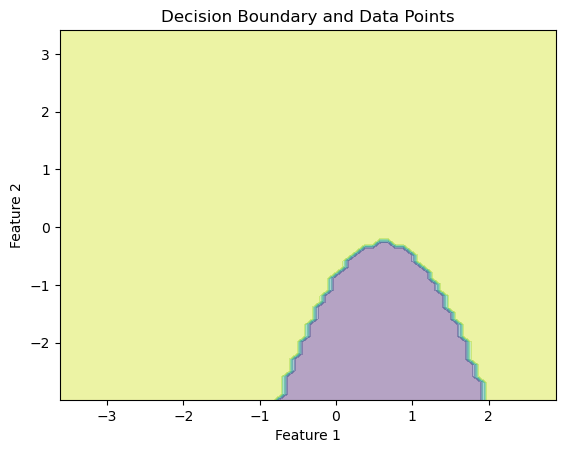

Custom Model Training Accuracy: 0.6
Custom Model Testing Accuracy: 0.6


In [32]:
import numpy as np
import matplotlib.pyplot as plt

class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.lr_custom = learning_rate
        self.num_iters_custom = num_iterations
        self.weights_custom = None
        self.bias_custom = None
        self.loss_history_custom = []
        self.val_loss_custom = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, y, y_pred):
        num_data_points = len(y)
        loss = (-1/num_data_points) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return loss

    def fit(self, X, y, X_val=None, y_val=None):
        num_data_points, num_features = X.shape
        self.weights_custom = np.zeros(num_features)
        self.bias_custom = 0
        self.val_loss_custom = None

        for iteration in range(self.num_iters_custom):
            z = np.dot(X, self.weights_custom) + self.bias_custom
            y_pred = self.sigmoid(z)

            loss = self.compute_loss(y, y_pred)
            self.loss_history_custom.append(loss)

            dw = (1/num_data_points) * np.dot(X.T, (y_pred - y))
            db = (1/num_data_points) * np.sum(y_pred - y)

            self.weights_custom -= self.lr_custom * dw
            self.bias_custom -= self.lr_custom * db

            # Calculating the validation loss if the validation data is given.
            if X_val is not None and y_val is not None:
                z_val = np.dot(X_val, self.weights_custom) + self.bias_custom
                y_pred_val = self.sigmoid(z_val)
                self.val_loss_custom = self.compute_loss(y_val, y_pred_val)

            # showing the loss at each iteration
            if iteration % 100 == 0:
                print(f"Iteration {iteration}, Training Loss: {loss}, Validation Loss: {self.val_loss_custom}")

            # Early termination condition
            if self.val_loss_custom is not None and iteration > 0 and self.val_loss_custom > self.loss_history_custom[-2]:
                print("Validation loss increased. Stopping training.")
                break

    def predict(self, X):
        z = np.dot(X, self.weights_custom) + self.bias_custom
        y_pred = self.sigmoid(z)
        return np.round(y_pred)

# Step 1: creating a synthetic dataset with two features
np.random.seed(42)
X_poly_train_custom = np.random.randn(100, 2)
y_train_custom = np.random.randint(0, 2, size=100)

# Step 2: Improve dataset by including polynomial characteristics
X_extended_custom = np.c_[X_poly_train_custom, X_poly_train_custom[:, 0] ** 2]  # Adding a new feature as the square of the first feature

# Step 3: dividing the dataset into training and testing sets
X_train_custom, X_test_custom = X_extended_custom[:80], X_extended_custom[80:]
y_train_custom, y_test_custom = y_train_custom[:80], y_train_custom[80:]

# Step 4: Utilizing validation data, train a logistic regression model
model_custom = MyLogisticRegression(learning_rate=0.1, num_iterations=5000)
model_custom.fit(X_train_custom, y_train_custom, X_test_custom, y_test_custom)

# Plotting the loss curve
plt.plot(range(len(model_custom.loss_history_custom)), model_custom.loss_history_custom)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

# To plot the decision boundary, create a grid of points.
x_min_plot_custom = X_train_custom[:, 0].min() - 1
x_max_plot_custom = X_train_custom[:, 0].max() + 1
y_min_plot_custom = X_train_custom[:, 1].min() - 1
y_max_plot_custom = X_train_custom[:, 1].max() + 1
xx_plot_custom, yy_plot_custom = np.meshgrid(np.arange(x_min_plot_custom, x_max_plot_custom, 0.1), np.arange(y_min_plot_custom, y_max_plot_custom, 0.1))
Z_plot_custom = model_custom.predict(np.c_[xx_plot_custom.ravel(), yy_plot_custom.ravel(), xx_plot_custom.ravel() ** 2])
Z_plot_custom = Z_plot_custom.reshape(xx_plot_custom.shape)
plt.contourf(xx_plot_custom, yy_plot_custom, Z_plot_custom, alpha=0.4, cmap='viridis')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary and Data Points')
plt.show()

# Step 6: Model evaluation using test data
y_pred_train_custom = model_custom.predict(X_train_custom)
y_pred_test_custom = model_custom.predict(X_test_custom)

# Determining the accuracy.
train_accuracy_custom = np.mean(y_pred_train_custom == y_train_custom)
test_accuracy_custom = np.mean(y_pred_test_custom == y_test_custom)
print("Custom Model Training Accuracy:", train_accuracy_custom)
print("Custom Model Testing Accuracy:", test_accuracy_custom)
